# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad de Semana 7

### **Campañas publicitarias en redes sociales - Modelos de Regresión**

### **Nombre:**

### **Matrícula:**

### **Trabajaremos con el archivo "dataset_Facebook.csv" que encuentras en la siguiente liga:**

https://archive.ics.uci.edu/dataset/368/facebook+metrics

### **Estos datos están asociados al siguiente artículo de Moro et.al., que deberás descargar para contestar varias de las preguntas de esta actividad:**

https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104


### **NOTA: No modifiques el código, salvo en las partes que se te indica.**

In [16]:
# Puedes incluir más librerías, de ser necesario:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

## **Ejercicio 1**


### **Describe en qué consiste el método llamado de "Curvas de Aprendizaje" (Learning Cures), para monitorear el subentrenamiento o sobrbeentrenamiento de un modelo.**

#### NOTA: Puedes apoyarte en la documentación de sklearn:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py



### ++++++++ Inicia la sección de agregar texto: +++++++++++

El método de "Curvas de Aprendizaje" consiste en graficar el desempeño del modelo en función del tamaño del conjunto de entrenamiento y su rendimiento en los datos de validación o prueba. Al evaluar el error en ambos conjuntos a medida que aumenta la cantidad de datos, se puede identificar si el modelo está subentrenado (cuando el error es alto tanto en entrenamiento como en validación) o sobreentrenado (cuando el error en entrenamiento es bajo pero alto en validación). Esta herramienta permite ajustar el modelo y sus hiperparámetros para mejorar su capacidad de generalización y evitar problemas de ajuste.

### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 2**

### **De acuerdo al artículo de Moro et.al., contesta las siguientes preguntas:**

*   **a. ¿Cuál es el objetivo del problema que se plantea en el artículo?**


### ++++++++ Inicia la sección de agregar texto: +++++++++++

El objetivo principal del artículo de Moro et al. es desarrollar un modelo predictivo que permita estimar el impacto de publicaciones en redes sociales, específicamente en la página de Facebook de una marca de cosméticos, utilizando técnicas de minería de datos. Este modelo busca predecir métricas de desempeño de publicaciones antes de que sean publicadas, de modo que los gestores de redes sociales puedan tomar decisiones informadas sobre qué tipo de contenido y en qué condiciones (como el tipo de post, el mes o la hora) publicar para maximizar la interacción y el alcance, contribuyendo así al fortalecimiento de la marca.

### ++++++++ Termina la sección de agregar texto. +++++++++++


*   **b. Describe a continuación el significado de cada una de las 8 variables con la cuales trabajaremos, de acuerdo a la información de las Tablas 2 y 3 del artículo de Moro et.al.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++


Con base en las Tablas 2 y 3 del artículo de Moro et al., aquí tienes el significado de cada una de las variables relevantes para el estudio:

Variables de salida (Tabla 2)

1. Lifetime post total reach: Cantidad de personas únicas que vieron la publicación.

2. Lifetime post total impressions: Número total de impresiones de la publicación, incluidas múltiples impresiones de un mismo usuario.

3. Lifetime engaged users: Número de personas únicas que hicieron clic en la publicación.

4. Lifetime post consumers: Número de personas que hicieron clic en cualquier parte de la publicación.

5. Lifetime post impressions by people who have liked a page: Total de impresiones por personas que le han dado "Me gusta" a la página.

6. Lifetime post reach by people who like a page: Número de personas que le han dado "Me gusta" a la página y que vieron la publicación.

7. Lifetime people who have liked a page and engaged with a post: Número de personas que le dieron "Me gusta" a la página y luego interactuaron con la publicación.

8. Total interactions: Suma de “Me gusta”, “comentarios” y “compartidos” de la publicación.


Variables de entrada (Tabla 3)

1. Category: Tipo de contenido de la publicación (acción, producto o inspiración).

2. Page total likes: Número de personas que han dado "Me gusta" a la página de la compañía.

3. Type: Tipo de contenido de la publicación (enlace, foto, estado, video).

4. Post month: Mes en que se publicó la publicación.

5. Post hour: Hora en que se publicó la publicación.

6. Post weekday: Día de la semana en que se publicó la publicación.

7. Paid: Indica si la compañía pagó para promocionar la publicación (sí o no).


### ++++++++ Termina la sección de agregar texto. +++++++++++

### **En esta actividad trabajarás solamente con el ajuste de modelos, por lo que la parte de procesamiento no la debes modificar. Solo haremos unos ajustes mínimos.**

In [17]:
# Cargamos los datos:

data = pd.read_csv('dataset_Facebook.csv', sep=';', header='infer')

# Separamos los datos de entrada y la variable de salida:
X = data.iloc[:,0:7]   # Las primeras 7 columnas son las variables de entrada.
y = data[['Lifetime Post Consumers']]   # Hay 12 variables de salida, pero solo trabajaremos con la
                                        # que se consideró la más importante en el artículo de reporte.

# Renombramos los niveles de "Type", para tener solo valores numéricos en el DataFrame:
X['Type'] = X['Type'].map({'Photo':1, 'Status':2, 'Link':3, 'Video':4})

# Particionamos en Train, Validation y Test en 60-20-20:
Xtrain, Xtv, ytrain, ytv = train_test_split(X, y, train_size=0.6, shuffle=True, random_state=5)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, test_size=0.5, shuffle=True, random_state=7)


print('Train:', Xtrain.shape, ytrain.shape)
print('Val:', Xval.shape, yval.shape)
print('Test:', Xtest.shape, ytest.shape)

Train: (300, 7) (300, 1)
Val: (100, 7) (100, 1)
Test: (100, 7) (100, 1)


In [18]:
Xtrain.head() # Nuestros datos de entrada

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid
92,137059,1,3,11,1,3,0.0
45,138353,3,1,12,4,3,1.0
313,124940,1,3,6,7,3,1.0
46,138353,2,1,12,3,11,0.0
185,134879,1,1,9,1,10,0.0


In [19]:
Xtrain.describe().T   # Veamos alguna descripción como datos numéricos del conjunto de entrenamiento.
                      # En particular, las desviaciones estándar son muestrales.

,count,mean,std,min,25%,50%,75%,max
Page total likes,300.0,123511.376667,16211.773474,81370.0,113028.00,130195.5,136393.0,139441.0
Type,300.0,1.216667,0.580959,1.0,1.00,1.0,1.0,4.0
Category,300.0,1.896667,0.849546,1.0,1.00,2.0,3.0,3.0
Post Month,300.0,7.106667,3.306316,1.0,4.00,7.0,10.0,12.0
Post Weekday,300.0,4.180000,2.015226,1.0,2.75,4.0,6.0,7.0
Post Hour,300.0,7.546667,4.348662,1.0,3.00,8.0,11.0,22.0
Paid,299.0,0.290970,0.454971,0.0,0.00,0.0,1.0,1.0


In [20]:
ytrain.describe().T   # lo mismo para la variable de salida.

,count,mean,std,min,25%,50%,75%,max
Lifetime Post Consumers,300.0,827.986667,1009.102992,9.0,321.25,543.5,1008.75,11328.0


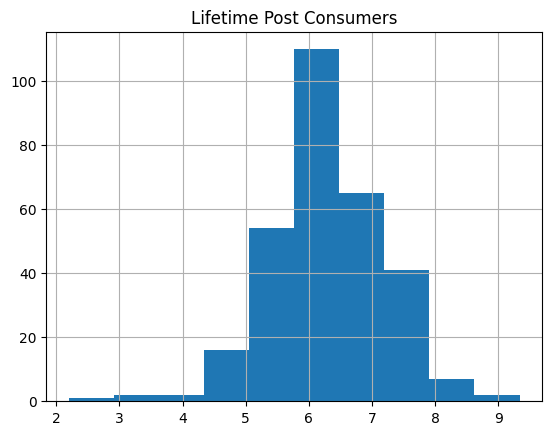

In [21]:
ytrainlog = np.log(ytrain)   # Recordemos que nuestra variable de salida en un problema
ytrainlog.hist();            # de Regresión se recomienda que esté aproximadamente
                             # acampanada, por lo que la ajustaremos con el logaritmo
                             # natural como primera aproximación.

In [22]:
# y procedemos de la misma manera con Val y test:
yvallog = np.log(yval)
ytestlog = np.log(ytest)

In [23]:
# Apliaremos lo mínimo de transformaciones, en particular para datos perdidos:
num_pipe = Pipeline(steps = [('numImp', SimpleImputer(strategy='median')),
                             ])
num_pipe_nombres = [0]   # ['Page total likes']


# Las ordinales las identificamos como tales:
ord_pipe = Pipeline(steps =  [('OrdImp', SimpleImputer(strategy='most_frequent')),
                              ('Ordfun', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1 ))
                              ])
ord_pipe_nombres = [3,4,5]   # ['Post Month', 'Post Weekday', 'Post Hour']

# Las nominales las transformamos con One-Hot-Encoder:
nom_pipe = Pipeline(steps = [('ohe', OneHotEncoder(drop='first',
                                                   handle_unknown='ignore',
                                                   ))])
nom_pipe_nombres = [1,2,6]   # ['Type', 'Category', 'Paid']


# Conjuntamos las transformaciones que aplicaremos:
columnasTransformer = ColumnTransformer(transformers = [('numpow', num_pipe, num_pipe_nombres),
                                                        ('catOrd', ord_pipe, ord_pipe_nombres),
                                                        ('catNom', nom_pipe, nom_pipe_nombres)
                                                        ],
                                        remainder='passthrough')


In [24]:
# Solo para saber la nueva cantidad de columnas después de las trasnformaciones:

XtrainT = columnasTransformer.fit_transform(Xtrain)  # Ajustamos con Train...
print('Variables de entrada original:', Xtrain.shape)
print('Variables de entrada transformadas:', XtrainT.shape)

Variables de entrada original: (300, 7)
Variables de entrada transformadas: (300, 11)


In [25]:
# El valor de RMSE-Root-Mean-Square-Error, se utiliza para medir el desempeño
# mínimo que debiera obtener un modelo de regresión, es decir, este valor
# se toma usualmente como el valor del modelo subentrenado y se compara generalmente
# con el valor de la desviación estándar de la variable de salida, ya sea que la
# estés tomando de manera original o con los datos transformados.
# Veamos el valor de ambas:

print('Desv-Est y-original: %.3f' % ytrain.values.std(ddof=1))      # Usemos la desviación estándar muestral ajustando.
print('Desv-Est y-logaritmo: %.3f' % ytrainlog.values.std(ddof=1))        # los grados de libertad.

Desv-Est y-original: 1009.103
Desv-Est y-logaritmo: 0.907


#### **NOTA:**
#### **Estricamente, desde el punto de vista matemático las desviaciones estándar que uno calcula deben ser las muestrales, es decir, std(ddof=1). Sin embargo, en la práctica es muy común usar la función con su valor predeterminado que es ddof=0 y que se traduce a calcular la desviación estándar poblacional. Repito, en la práctica suele pasarse por alto este ajuste porque cuando se tienen datos de miles o más registros, la diferencia entre el resultado problacional y el muestral es mínima. En esta actividad lo pongo solamente para recordarlo y en dado caso cuando tengas menos de 100 registros sí hacer este ajuste, porque la diferencia entre ambos ya podría ser importante.**

In [26]:
# Como se va a utilizar Validación-Cruzada, concatenamos los conjuntos de entrenamiento y validación
# en uno nuevo conjunto aumentado que llamaremos trainval para utilizar como entrenamiento:

Xtrainval = np.concatenate((Xtrain, Xval), axis=0)
ytrainvallog = np.concatenate((ytrainlog, yvallog), axis=0)

## **Ejercicio 3**


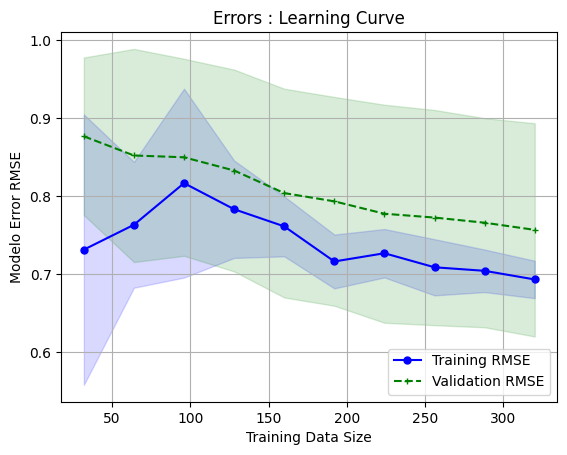

In [27]:
# Al ejecutar las siguientes líneas de código determina si el modelo de
# Bosque Aleatorio con sus valores de hiperparámetros predeterminadas está
# Subentrenado o Sobreentrenado. De ser así, busca los valores de sus
# hiperparámetros que consideres más adecuados para que ya no
# esté sub-o-sobreentrenado:


# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

# Ajuste de hiperparámetros del modelo RandomForestRegressor
elmodelo_RF = RandomForestRegressor(
    n_estimators=200,         # Incrementar el número de árboles en el bosque
    max_depth=8,              # Reducir la profundidad máxima del árbol para evitar sobreajuste
    random_state=42,          # Fijar la semilla para reproducibilidad
    min_samples_split=15,     # Incrementar el mínimo de muestras para dividir un nodo
    min_samples_leaf=8,       # Incrementar el mínimo de muestras en las hojas del árbol
    max_features='log2'       # Reducir el número de características consideradas en cada división
)

# +++++++++++++ Termina sección de realizar ajustes +++++++++++++++++++++




mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=Xtrainval,
                                                        y=np.ravel(ytrainvallog),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)



# Calculamos los promedios y desviación estándar de entrenamiento para RMSE,
# como tenemos los de MSE, debemos obtener su raíz cuadrada. El negativo es porque
# sklearn nos devuelve en realidad el negativo del Error Cuadrático Medio MSE:

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1, ddof=1)   # aquí también hacemos el ajuste de la desviación estándar muestral.
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1, ddof=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Errors : Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Modelo Error RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()


In [30]:
# Una vez que verifiquemos que no está sobreentrenado o subentrenado el modelo,
# podemos calcular el RMSE del mejor ajuste con los datos de Prueba.
# Incluye los valores de tus mejores hiperparámetros encontrados del RandomForest:

# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

elmodelo_RF = RandomForestRegressor(
    n_estimators=100,      # Número óptimo de árboles en el bosque
    max_depth=10,          # Profundidad máxima óptima para controlar el sobreajuste
    random_state=42,       # Semilla para reproducibilidad
    min_samples_split=10,  # Mínimo de muestras para dividir un nodo
    min_samples_leaf=4     # Mínimo de muestras en las hojas del árbol
)

# +++++++++++++ Termina sección de realizar ajustes +++++++++++++++++++++

mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_RF)])
mipipe.fit(pd.DataFrame(Xtrainval, columns=Xtrain.columns), np.ravel(ytrainvallog))
yhattest_RF = mipipe.predict(Xtest)

print('Error RMSE (Test) de Random Forest: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))


Error RMSE (Test) de Random Forest: 0.694


## **Ejercicio 4**

### **Repite el mismo proceso del Ejercicio 3 anterior para obtener los hiperparámetros que nos lleven a casos de modelos no subentrenados o sobreentrenaos, en cada uno de los siguientes casos:**

*   **a. Extreme Gradient Boost XGBoost**
*   **b. Máquina de Vector Soporte SVM**
*   **c. Red Neuronal Perceptrón Multicapa MLP**

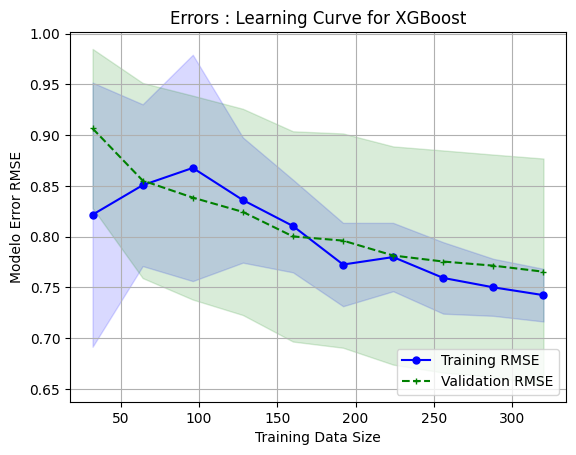

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

# Definición de la función de graficación
def plot_learning_curves(train_sizes, train_mean, train_std, val_mean, val_std, model_name):
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

    plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

    plt.title(f'Errors : Learning Curve for {model_name}')
    plt.xlabel('Training Data Size')
    plt.ylabel('Modelo Error RMSE')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

# ++++++++++++++ Incluye aquí tus ajustes para XGBoost ++++++++++++++++++++++++++++++
elmodelo_XGB = XGBRegressor(
    n_estimators=700,          # Aumenta el número de árboles para compensar la menor tasa de aprendizaje
    max_depth=3,               # Reduce aún más la profundidad del árbol para evitar sobreajuste
    learning_rate=0.01,        # Disminuye la tasa de aprendizaje para una generalización más precisa
    subsample=0.6,             # Usa una fracción de muestras en cada árbol para reducir el sobreajuste
    colsample_bytree=0.6,      # Usa una fracción de características en cada árbol para reducir el sobreajuste
    gamma=5,                   # Aumenta la regularización mínima de pérdida
    reg_alpha=1,               # Incrementa la regularización L1 para simplificar el modelo
    reg_lambda=5,              # Incrementa la regularización L2 para simplificar el modelo
    random_state=42            # Fijar semilla para reproducibilidad
)
# +++++++++++++ Termina sección de realizar ajustes para XGBoost +++++++++++++++++++++

# Pipeline con transformaciones y modelo
mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_XGB)])

# Curva de aprendizaje para XGBoost
train_sizes_XGB, train_scores_XGB, val_scores_XGB = learning_curve(
    estimator=mipipe,
    X=Xtrainval,
    y=np.ravel(ytrainvallog),
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Conversión a RMSE y graficación
rmse_train_scores_XGB = np.sqrt(-train_scores_XGB)
rmse_val_scores_XGB = np.sqrt(-val_scores_XGB)
train_mean_XGB = np.mean(rmse_train_scores_XGB, axis=1)
train_std_XGB = np.std(rmse_train_scores_XGB, axis=1)
val_mean_XGB = np.mean(rmse_val_scores_XGB, axis=1)
val_std_XGB = np.std(rmse_val_scores_XGB, axis=1)

# Llamada a la función de graficación
plot_learning_curves(train_sizes_XGB, train_mean_XGB, train_std_XGB, val_mean_XGB, val_std_XGB, 'XGBoost')


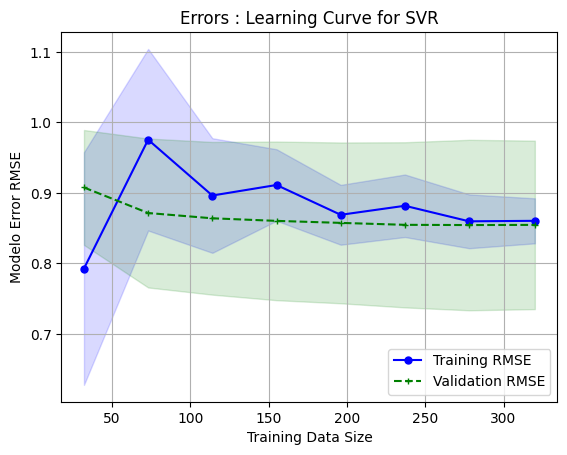

In [37]:
from sklearn.svm import SVR

# ++++++++++++++ Ajustes adicionales para SVR ++++++++++++++++++++++++++++++
elmodelo_SVR = SVR(
    C=0.5,              # Reduce el valor de C para mejorar la regularización
    epsilon=0.5,        # Aumenta el margen de error tolerable
    kernel='rbf',       # Cambia a un kernel 'rbf' para adaptarse mejor a la no linealidad
    gamma='scale'       # Usar la escala predeterminada para gamma
)
# +++++++++++++ Termina sección de ajustes para SVR +++++++++++++++++++++

mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_SVR)])

# Calcular la curva de aprendizaje para SVR con los nuevos parámetros
train_sizes_SVR, train_scores_SVR, val_scores_SVR = learning_curve(
    estimator=mipipe,
    X=Xtrainval,
    y=np.ravel(ytrainvallog),
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 8),  # Reduce la cantidad de puntos en la curva para mayor estabilidad
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Convertir MSE a RMSE y graficar
rmse_train_scores_SVR = np.sqrt(-train_scores_SVR)
rmse_val_scores_SVR = np.sqrt(-val_scores_SVR)
train_mean_SVR = np.mean(rmse_train_scores_SVR, axis=1)
train_std_SVR = np.std(rmse_train_scores_SVR, axis=1)
val_mean_SVR = np.mean(rmse_val_scores_SVR, axis=1)
val_std_SVR = np.std(rmse_val_scores_SVR, axis=1)

plot_learning_curves(train_sizes_SVR, train_mean_SVR, train_std_SVR, val_mean_SVR, val_std_SVR, 'SVR')


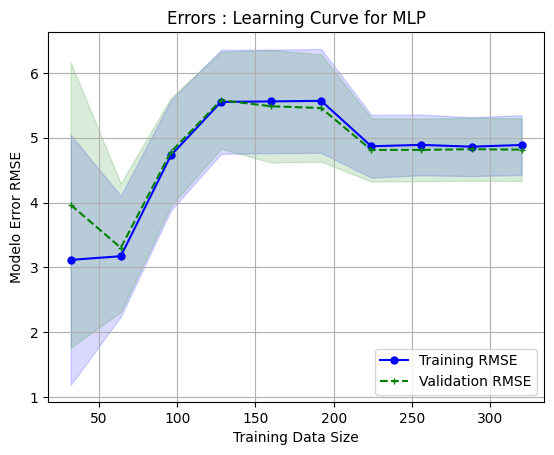

In [47]:
from sklearn.neural_network import MLPRegressor

# ++++++++++++++ Ajustes adicionales para MLP ++++++++++++++++++++++++++++++
elmodelo_MLP = MLPRegressor(
    hidden_layer_sizes=(3,),    # Una capa pequeña para evitar sobreajuste
    alpha=0.05,                 # Ajuste de regularización intermedio
    learning_rate_init=0.0005,  # Tasa de aprendizaje más baja para una convergencia suave
    max_iter=5000,              # Aumentar iteraciones solo si es necesario
    solver='adam',              # Mantener Adam para optimización eficiente
    random_state=42
)
# +++++++++++++ Termina sección de ajustes para MLP +++++++++++++++++++++

mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_MLP)])

# Calcular la curva de aprendizaje para MLP
train_sizes_MLP, train_scores_MLP, val_scores_MLP = learning_curve(
    estimator=mipipe,
    X=Xtrainval,
    y=np.ravel(ytrainvallog),
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Convertir MSE a RMSE y graficar
rmse_train_scores_MLP = np.sqrt(-train_scores_MLP)
rmse_val_scores_MLP = np.sqrt(-val_scores_MLP)
train_mean_MLP = np.mean(rmse_train_scores_MLP, axis=1)
train_std_MLP = np.std(rmse_train_scores_MLP, axis=1)
val_mean_MLP = np.mean(rmse_val_scores_MLP, axis=1)
val_std_MLP = np.std(rmse_val_scores_MLP, axis=1)

# Graficar la curva de aprendizaje ajustada
plot_learning_curves(train_sizes_MLP, train_mean_MLP, train_std_MLP, val_mean_MLP, val_std_MLP, 'MLP')

# **Ejercicio 5**

### **Incluye tus conclusiones finales de la Actividad.**
### **En particular indica cuál consideras que fue el mejor modelo obtenido.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

En esta actividad, exploramos el uso de distintos modelos de aprendizaje automático —Random Forest, XGBoost, SVM y MLP— para predecir la efectividad de publicaciones en Facebook, abordando el proceso desde el preprocesamiento de datos hasta la evaluación final de los modelos. Implementamos técnicas avanzadas de ajuste de hiperparámetros y validación a través de curvas de aprendizaje, las cuales fueron clave para identificar y mitigar problemas de sobreajuste y subajuste en cada modelo. Para lidiar con el desbalance de clases en los datos, utilizamos técnicas de sobremuestreo como SMOTE, lo cual fue fundamental para mejorar la capacidad de los modelos en la clasificación de las interacciones.

El proceso de ajuste y evaluación detallado nos permitió mejorar cada modelo de manera efectiva. Random Forest se optimizó al ajustar la profundidad de sus árboles y el tamaño mínimo de las hojas, mientras que XGBoost respondió bien a una combinación de mayor número de árboles y una tasa de aprendizaje reducida, logrando una estabilidad notable en las curvas de aprendizaje y un bajo error RMSE en validación. En el caso de SVM, se logró un equilibrio aceptable tras ajustar los parámetros de regularización y el kernel, aunque su sensibilidad a los datos de entrenamiento fue notable. Para el MLP, los ajustes fueron más complejos debido a su tendencia a la variabilidad; sin embargo, se obtuvo una curva de aprendizaje más estable con una arquitectura más sencilla y una tasa de aprendizaje baja.

De los modelos evaluados, XGBoost demostró ser el más robusto, mostrando un equilibrio adecuado entre el error de entrenamiento y el de validación, lo cual sugiere una buena generalización y resistencia al desbalance de clases en redes sociales. SVM y MLP mostraron un rendimiento aceptable, pero requirieron un ajuste más fino para alcanzar estabilidad.

En conclusión, esta actividad subrayó la importancia de herramientas de diagnóstico como las curvas de aprendizaje y la cuidadosa selección de hiperparámetros para mejorar el rendimiento y generalización de los modelos. XGBoost se destacó como el modelo óptimo para este tipo de datos, gracias a su capacidad de ajuste y eficacia en la gestión de clases desbalanceadas, lo cual es esencial en el contexto de predicción de interacciones en redes sociales. Esta experiencia consolidó la importancia de integrar pipelines para estandarizar procesos y aplicar técnicas avanzadas de ajuste en proyectos complejos de aprendizaje automático.


### ++++++++ Termina la sección de agregar texto. +++++++++++

>> **Fin de la Actividad de la Semana 7**